# 第十一次课-课后练习

本次作业是课后练习，供大家熟练课堂上讲授的基础知识点，不计入任何分数。

请将作业命名为 HW11-课后练习+姓名+学号.ipynb</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import jieba
import warnings
import re
warnings.filterwarnings('ignore')

## 一、中文商品评论数据的分类

本部分已经提供了参考输出，你的代码运行结果需要与之相同

### 1.1 中文语料预处理基础:分词(停用词表)

#### 1.1.1 输入数据，观察各类别评论数量
使用`pandas`输入数据，统计各类别语料的规模

In [2]:
pd_all=pd.read_csv(r'./online_shopping_10_cats.csv',encoding='utf-8')
pd_all

,cat,label,review
0,书籍,1,﻿做父母一定要有刘墉这样的心态，不断地学习，不断地进步，不断地给自己补充新鲜血液，让自己保持...
1,书籍,1,作者真有英国人严谨的风格，提出观点、进行论述论证，尽管本人对物理学了解不深，但是仍然能感受到...
2,书籍,1,作者长篇大论借用详细报告数据处理工作和计算结果支持其新观点。为什么荷兰曾经县有欧洲最高的生产...
3,书籍,1,作者在战几时之前用了＂拥抱＂令人叫绝．日本如果没有战败，就有会有美军的占领，没胡官僚主义的延...
4,书籍,1,作者在少年时即喜阅读，能看出他精读了无数经典，因而他有一个庞大的内心世界。他的作品最难能可贵...
...,...,...,...
62769,酒店,0,我们去盐城的时候那里的最低气温只有4度，晚上冷得要死，居然还不开空调，投诉到酒店客房部，得到...
62770,酒店,0,房间很小，整体设施老化，和四星的差距很大。毛巾太破旧了。早餐很简陋。房间隔音很差，隔两间房间...
62771,酒店,0,我感觉不行。。。性价比很差。不知道是银川都这样还是怎么的！
62772,酒店,0,房间时间长，进去有点异味！服务员是不是不够用啊！我在一楼找了半个小时以上才找到自己房间，想找...


In [3]:
# 统计各类别预料的规模
all_cats=pd_all['cat'].unique()
for cat in all_cats:
    # TODO
    # 将cat列中为cat的行提取出来，然后统计行数，并且统计lable=1的行数与lable=0的行数

书籍 , 3851 （总体）, 2100 （正例）, 1751 （负例）
平板 , 10000 （总体）, 5000 （正例）, 5000 （负例）
手机 , 2323 （总体）, 1165 （正例）, 1158 （负例）
水果 , 10000 （总体）, 5000 （正例）, 5000 （负例）
洗发水 , 10000 （总体）, 5000 （正例）, 5000 （负例）
热水器 , 575 （总体）, 475 （正例）, 100 （负例）
蒙牛 , 2033 （总体）, 992 （正例）, 1041 （负例）
衣服 , 10000 （总体）, 5000 （正例）, 5000 （负例）
计算机 , 3992 （总体）, 1996 （正例）, 1996 （负例）
酒店 , 10000 （总体）, 5000 （正例）, 5000 （负例）


#### 1.1.2 文本预处理
- 获取停用词表
- 对文本进行分词，保留中文，去除停用词

In [4]:
# 获取停用词表
file_path=r'./cn_stopwords.txt'
def get_stopwords(file_path):
    '''
    获取停用词表
    Return:
        stopwords (list of strings): 停用词表
    '''
    # TODO
    
stopwords=get_stopwords(file_path)
stopwords[:10]

['$', '0', '1', '2', '3', '4', '5', '6', '7', '8']

- 文本预处理
- 所有句子都变成空格分割，以方便调用sklearn的CountVectorizer
- 选1000个lable=1的句子，1000个lable=0的句子——取数据集中水果类别的前1000个和后1000个review
- 对去除的句子进行预处理，分词后的结果保存在corpus4bayes中

In [5]:
# 文本预处理
def preprocess(text, stopwords):
    '''预处理
       Params:
            text (string): 一个源数据中的句子
            stopwords (list of strings): 停用词表
       Return:
            text (string): 预处理后的句子
    '''
    # TODO
    # 调用jieba分词
    # 仅保留中文，其余去掉
    # 去掉停用词
    
    return text

# TODO
corpus4bayes[:5]

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/n5/hxfz5jwj03jdcljkq0n8ftmc0000gn/T/jieba.cache
Loading model cost 0.573 seconds.
Prefix dict has been built successfully.


[' 好吃  下次 买宏辉 果蔬    好些  甜  一分钱 一分货  日期 新鲜',
 '第一次 购买 潘 苹果  甘肃 产  口感 属于 那种 粉粉  脆  感觉 陕西 那种 脆 好吃 ',
 '棒棒 哒  京东 太给力  苹果 没有 吃  看起来 不错',
 '水果 新鲜  希望 多出 特价 水果 ',
 '好吃 好吃 好吃 好吃      吃 买  喜欢']

### 1.2 在语料库级别对词汇特征进行统计:TF，IDF

- 声明TFIDF模型，默认df值从1开始，也可以设置属性过滤掉一些低频值
- 设置token_pattern=r"(?u)\b\w+\b"，包含单个汉字的词

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
# TODO


print(words_vec.shape)

(2000, 4058)


- 获取需要训练的特征`feature`
- 获取训练集和测试集 
- 用`np.random.choice`随机选取80%的数据作为训练集，剩下的作为测试集

In [7]:
# TODO

print(features4test.shape,features4train.shape)
features4test.head()

(400, 4058) (1600, 4058)


,0,1,2,3,4,5,6,7,8,9,...,4048,4049,4050,4051,4052,4053,4054,4055,4056,4057
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- 获取训练所需的标签`label`

In [8]:
# TODO

print(label4test.shape,label4train.shape)
label4test.head()

(400,) (1600,)


16178    1
16182    1
16188    1
16189    1
16190    1
Name: label, dtype: int64

- 构建数据集的函数`construct_features`
- 构建训练集与测试集
- 进行贝叶斯分类

In [97]:
import nltk
# 获取特征名
feature_names=count_vect.get_feature_names_out()
# 构建特征
def construct_features(features,labels,feature_names):
    # TODO
    
    return feature_list

# TODO
# 构建训练集和测试集

classifier = nltk.NaiveBayesClassifier.train(train_dataset)
print(nltk.classify.accuracy(classifier, test_dataset))
classifier.show_most_informative_features(5)

0.8825
Most Informative Features
                      很甜 = 1                   1 : 0      =     38.9 : 1.0
                     火龙果 = 1                   0 : 1      =     27.1 : 1.0
                      不甜 = 1                   0 : 1      =     19.0 : 1.0
                      不错 = 2                   1 : 0      =     15.6 : 1.0
                       赞 = 1                   1 : 0      =     15.6 : 1.0


### 1.3 引入外部语言资源：情感词典

读取情感词典，并保留其‘词语’，‘强度’，‘极性’三列为优化分类做准备

In [9]:
df=pd.read_excel(r'./情感词汇.xlsx',keep_default_na=False)
df=df[['词语','强度','极性']]
df.head()

,词语,强度,极性
0,脏乱,7,2
1,糟报,5,2
2,早衰,5,2
3,责备,5,2
4,贼眼,5,2


将词语->极性和词语->强度的映射关系整理为两个新的字典，方便之后的处理操作

In [10]:
# TODO
sentiment_words=
strength_words=
sentiment_words

{'脏乱': 2,
 '糟报': 2,
 '早衰': 2,
 '责备': 2,
 '贼眼': 2,
 '战祸': 2,
 '招灾': 2,
 '折辱': 2,
 '中山狼': 2,
 '清峻': 0,
 '清莹': 1,
 '轻倩': 1,
 '晴丽': 1,
 '求索': 1,
 '热潮': 1,
 '仁政': 1,
 '荣名': 1,
 '柔腻': 1,
 '瑞雪': 1,
 '擅名': 1,
 '神采': 1,
 '省便': 1,
 '盛开': 1,
 '盛誉': 1,
 '诗仙': 1,
 '爽脆': 1,
 '素洁': 1,
 '诪张': 2,
 '株连': 2,
 '坠毁': 2,
 '滋生': 2,
 '自恃': 2,
 '走后门': 2,
 '阻力': 2,
 '罪状': 2,
 '做戏': 2,
 '甜头': 1,
 '头名': 1,
 '婉妙': 1,
 '温淑': 1,
 '稳厚': 1,
 '沃壤': 1,
 '无上': 1,
 '喜人': 1,
 '先贤': 1,
 '鲜妍': 1,
 '相称': 1,
 '骁骑': 1,
 '新巧': 1,
 '新意': 1,
 '信奉': 1,
 '急智': 1,
 '技艺': 1,
 '雄劲': 1,
 '雄肆': 1,
 '秀俊': 1,
 '煦煦': 1,
 '勋绩': 1,
 '雅淡': 1,
 '雅兴': 1,
 '严整': 1,
 '泱泱': 1,
 '怡悦': 1,
 '义诊': 1,
 '英发': 1,
 '英伟': 1,
 '莹润': 1,
 '勇健': 1,
 '优厚': 1,
 '幽雅': 1,
 '有识': 1,
 '友邻': 1,
 '玉人': 1,
 '元勋': 1,
 '佳句': 1,
 '佳趣': 1,
 '兼爱': 1,
 '坚守': 1,
 '简雅': 1,
 '荐举': 1,
 '见称': 1,
 '见闻': 1,
 '奖旗': 1,
 '奖许': 1,
 '姣丽': 1,
 '娇丽': 1,
 '骄子': 1,
 '解惑': 1,
 '津要': 1,
 '金嗓子': 1,
 '匀净': 1,
 '赞词': 1,
 '真纯': 1,
 '箴言': 1,
 '珍玩': 1,
 '正理': 1,
 '指导': 1,
 '至理': 1,
 '致敬': 1,
 '智多星':

- 获取数据集中的关于书籍的数据

In [11]:
target_cats=['书籍']
# 去除书籍的评论数据
pd_data=pd_all[pd_all.cat.isin(target_cats)]
# 将句序号加入dataframe中，位之后的处理做准备
sentence_id=[i+1 for i in range(len(pd_data))]
pd_data['sentence_id']=sentence_id
pd_data

,cat,label,review,sentence_id
0,书籍,1,﻿做父母一定要有刘墉这样的心态，不断地学习，不断地进步，不断地给自己补充新鲜血液，让自己保持...,1
1,书籍,1,作者真有英国人严谨的风格，提出观点、进行论述论证，尽管本人对物理学了解不深，但是仍然能感受到...,2
2,书籍,1,作者长篇大论借用详细报告数据处理工作和计算结果支持其新观点。为什么荷兰曾经县有欧洲最高的生产...,3
3,书籍,1,作者在战几时之前用了＂拥抱＂令人叫绝．日本如果没有战败，就有会有美军的占领，没胡官僚主义的延...,4
4,书籍,1,作者在少年时即喜阅读，能看出他精读了无数经典，因而他有一个庞大的内心世界。他的作品最难能可贵...,5
...,...,...,...,...
3846,书籍,0,"买回来才知道,一点都不好看....",3847
3847,书籍,0,不怎么样拉，都是很烂的笑话加几个单词而已，贵哦。得考虑呢。。。,3848
3848,书籍,0,做为一本声名在外的流行书，说的还是广州的外企，按道理应该和我的生存环境差不多啊。但是一看之下...,3849
3849,书籍,0,说实话，从理论上来说，别说求医就是求人也不如求己，但是，很多时候我们自己无法完成的事情，只能...,3850


- 评论数据预处理，切分
- 将切分后的数据作为新的一列`word`加入到数据集中，按照课件中的操作，将切分的词用空格连接为string

In [12]:
# TODO
pd_data.head()

,cat,label,review,sentence_id,word
0,书籍,1,﻿做父母一定要有刘墉这样的心态，不断地学习，不断地进步，不断地给自己补充新鲜血液，让自己保持...,1,做 父母 一定 刘墉 心态 不断 学习 不断 进步 不断 补充 新鲜血液 保持 一...
1,书籍,1,作者真有英国人严谨的风格，提出观点、进行论述论证，尽管本人对物理学了解不深，但是仍然能感受到...,2,作者 真有 英国人 严谨 风格 提出 观点 进行 论述 论证 物理学 了解 不深 仍...
2,书籍,1,作者长篇大论借用详细报告数据处理工作和计算结果支持其新观点。为什么荷兰曾经县有欧洲最高的生产...,3,作者 长篇大论 借用 详细 报告 数据处理 工作 计算结果 支持 其新 观点 荷兰 曾经 ...
3,书籍,1,作者在战几时之前用了＂拥抱＂令人叫绝．日本如果没有战败，就有会有美军的占领，没胡官僚主义的延...,4,作者 战 之前 拥抱 令人 叫绝 日本 没有 战败 会 美军 占领 没胡 官僚主义...
4,书籍,1,作者在少年时即喜阅读，能看出他精读了无数经典，因而他有一个庞大的内心世界。他的作品最难能可贵...,5,作者 少年 时即 喜 阅读 看出 精读 无数 经典 一个 庞大 内心世界 作品 难能可...


- 设计通过情感词典进行的句子情感特征提取，设计初步方案

In [13]:
def sentiment_analysis(df,sentiment_words,strength_words):
    '''
    sentiment_score:该句的总情感强度得分
    positive_score:该句的正向情感强度得分
    negative_score:该句的负向情感强度得分
    '''
    sentiment_score=0
    positive_score=0
    negative_score=0
    # 遍历当前句的每个词
    # TODO
    
    return sentiment_score,positive_score,negative_score            

- 构造新的特征（三个score）`new_features`
- 获取数据的标签`labels`

In [19]:
# TODO
new_features,labels

(      sentiment_score  positive_score  negative_score
 0                 -17              29              46
 1                  20              28               8
 2                  27              35               8
 3                  -7              21              28
 4                  32              38               6
 ...               ...             ...             ...
 3846                0               0               0
 3847               -4               0               4
 3848               -2              10              12
 3849               -8               7              15
 3850               21              31              10
 
 [3851 rows x 3 columns],
 0       1
 1       1
 2       1
 3       1
 4       1
        ..
 3846    0
 3847    0
 3848    0
 3849    0
 3850    0
 Name: label, Length: 3851, dtype: int64)

常规的向量化-降维-贝叶斯分类训练

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# TODO
# 进行训练集和测试集的划分，test_size=0.1

# 进行贝叶斯模型的初始化和训练


# # 在测试集上进行预测

# 计算预测的效果，使用f1_score

print('F1 score:',f1)

F1 score: 0.6941176470588236


#### 1.3.1 情感词典优化

In [21]:
# 情感分析函数
def my_sentiment_analysis(df,sentiment_words,strength_words):
    '''
    sentiment_score:该句的总情感强度得分
    positive_score:该句的正向情感强度得分
    negative_score:该句的负向情感强度得分
    sentiment:该句的情感极性，1表示正向，0表示负向
    positive_count:正向词占比
    negative_count:负向词占比
    '''
    positive_count=0
    negative_count=0
    positive_score=0
    negative_score=0
    
    length=len(df)
    
    # TODO
    
    return sentiment_score,positive_score,negative_score,sentiment,positive_count,negative_count

- 构造新的特征`new_features1`

In [24]:
# TODO
new_features1

,sentiment_score,positive_score,negative_score,sentiment,positive_count,negative_count
0,-17,29,46,0,1.0,2.0
1,20,28,8,1,1.2,0.4
2,27,35,8,1,1.4,0.4
3,-7,21,28,0,0.6,0.8
4,32,38,6,1,1.6,0.4
...,...,...,...,...,...,...
3846,0,0,0,0,0.0,0.0
3847,-4,0,4,0,0.0,0.4
3848,-2,10,12,0,0.4,0.4
3849,-8,7,15,0,0.2,0.6


使用新的特征进行常规的向量化-降维-贝叶斯分类训练

In [25]:
# TODO

print('F1 score:',f1)

F1 score: 0.717201166180758


- 加入新的特征之后进行情感分析

In [26]:
def my_sentiment_analysis1(df,sentiment_words,strength_words,category_words,dict4catwords):
    sentiment_score=0
    positive_score=0
    negative_score=0
    category_score=0
    
    # TODO
    
    return sentiment_score,positive_score,negative_score,category_score

In [23]:
df=pd.read_excel(r'./情感词汇.xlsx',keep_default_na=False)
df=df[['词语','强度','极性','情感分类']]
category_words=dict(zip(df['词语'],df['情感分类']))
dict4catwords=dict(df.groupby('情感分类')['词语'].count())
df.head(),category_words,dict4catwords

(   词语  强度  极性 情感分类
 0  脏乱   7   2   NN
 1  糟报   5   2   NN
 2  早衰   5   2   NE
 3  责备   5   2   NN
 4  贼眼   5   2   NN,
 {'脏乱': 'NN',
  '糟报': 'NN',
  '早衰': 'NE',
  '责备': 'NN',
  '贼眼': 'NN',
  '战祸': 'ND',
  '招灾': 'NN',
  '折辱': 'NE',
  '中山狼': 'NN',
  '清峻': 'PH',
  '清莹': 'PH',
  '轻倩': 'PH',
  '晴丽': 'PH',
  '求索': 'PH',
  '热潮': 'PH',
  '仁政': 'PH',
  '荣名': 'PH',
  '柔腻': 'PH',
  '瑞雪': 'PA',
  '擅名': 'PD',
  '神采': 'PA',
  '省便': 'PH',
  '盛开': 'PH',
  '盛誉': 'PH',
  '诗仙': 'PH',
  '爽脆': 'PH',
  '素洁': 'PH',
  '诪张': 'NN',
  '株连': 'NN',
  '坠毁': 'NB',
  '滋生': 'NN',
  '自恃': 'NN',
  '走后门': 'NN',
  '阻力': 'NN',
  '罪状': 'NN',
  '做戏': 'NN',
  '甜头': 'PB',
  '头名': 'PH',
  '婉妙': 'PH',
  '温淑': 'PB',
  '稳厚': 'PH',
  '沃壤': 'PH',
  '无上': 'PH',
  '喜人': 'PA',
  '先贤': 'PD',
  '鲜妍': 'PH',
  '相称': 'PH',
  '骁骑': 'PH',
  '新巧': 'PH',
  '新意': 'PH',
  '信奉': 'PG',
  '急智': 'PH',
  '技艺': 'PH',
  '雄劲': 'PH',
  '雄肆': 'PH',
  '秀俊': 'PH',
  '煦煦': 'PH',
  '勋绩': 'PH',
  '雅淡': 'PH',
  '雅兴': 'PH',
  '严整': 'PH',
  '泱泱': 'PH',
  '怡悦': '

- 构造新的特征`new_features2`

In [27]:
# TODO

new_features2

,sentiment_score,positive_score,negative_score,category_score
0,-17,29,46,72532
1,20,28,8,21717
2,27,35,8,68188
3,-7,21,28,34156
4,32,38,6,61748
...,...,...,...,...
3846,0,0,0,0
3847,-4,0,4,15166
3848,-2,10,12,18200
3849,-8,7,15,9775


使用新的特征进行常规的向量化-降维-贝叶斯分类训练

In [28]:
# TODO

print('F1 score:',f1)

F1 score: 0.7155425219941348


## 二、网络(图)分析基础

### 2.1 熟悉图分析软件包NetworkX的基本使用

#### 2.1.1 图的创建
请按照给出的例子创建一个无向图，并绘制带节点标签的图片(具体相对位置可能有所不同，保证节点和边一致即可)

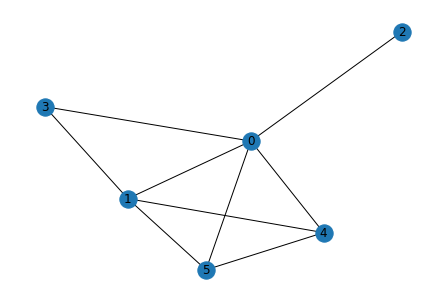

In [1]:
import networkx as nx
#TODO:


#### 2.1.2 修改Graph
对上面的无向图进行修改，添加6号节点，添加边（1，6），并绘制带标签的图片

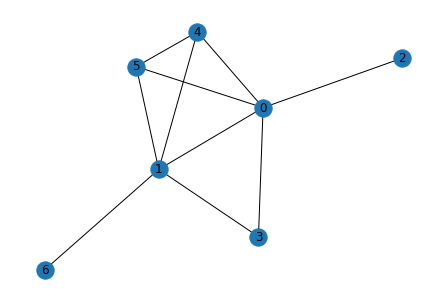

In [2]:
#TODO:


### 2.1.3 添加节点属性
对每一个节点添加weight属性，其值为节点的度数，并绘制带标签的图片，要求节点的大小和weight的大小成正比

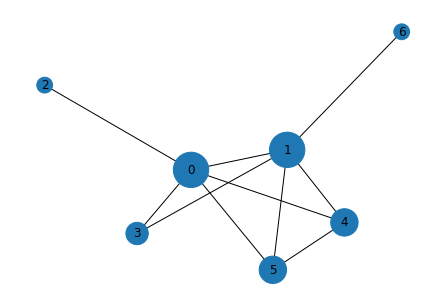

In [3]:
#TODO:


#### 2.1.4 点中心度计算
计算每个节点的点中心度，并将其作为centrality属性添加到节点属性中，并按照示例输出打印节点的信息

In [4]:
#TODO:


Node:0	Attributes: {'weight': 5, 'centrality': 0.8333333333333333}
Node:1	Attributes: {'weight': 5, 'centrality': 0.8333333333333333}
Node:2	Attributes: {'weight': 1, 'centrality': 0.16666666666666666}
Node:3	Attributes: {'weight': 2, 'centrality': 0.3333333333333333}
Node:4	Attributes: {'weight': 3, 'centrality': 0.5}
Node:5	Attributes: {'weight': 3, 'centrality': 0.5}
Node:6	Attributes: {'weight': 1, 'centrality': 0.16666666666666666}
